# Sample example of collected data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os

In [5]:
path = 'D://studying//masters//big_data//data//'
num = 67 

In [6]:
os.listdir(path)[num]

'KEYUSDT-trades-2024-03-2024-08.parquet.gzip'

In [7]:
# Load only specific columns
df_i = pd.read_parquet(path+os.listdir(path)[num], 
                     engine='fastparquet')

In [8]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11272102 entries, 0 to 11272101
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   TradeID        int64  
 1   Price          float64
 2   Quantity       float64
 3   QuoteQuantity  float64
 4   Timestamp      int64  
 5   BuyerIsMaker   bool   
 6   BestMatch      bool   
 7   Currency       object 
dtypes: bool(2), float64(3), int64(2), object(1)
memory usage: 537.5+ MB


In [9]:
df_i.describe()

,TradeID,Price,Quantity,QuoteQuantity,Timestamp
count,1.127210e+07,1.127210e+07,1.127210e+07,1.127210e+07,1.127210e+07
mean,4.980914e+07,8.602184e-03,1.168843e+04,9.589368e+01,1.713589e+12
std,3.253976e+06,2.070797e-03,5.203954e+04,4.691609e+02,4.111717e+09
min,4.417308e+07,3.295000e-03,1.000000e+00,3.351000e-03,1.709251e+12
25%,4.699111e+07,7.152000e-03,8.970000e+02,7.545010e+00,1.710559e+12
50%,4.980914e+07,8.677000e-03,2.829000e+03,2.275390e+01,1.711732e+12
75%,5.262716e+07,1.001800e-02,9.424000e+03,7.700261e+01,1.716446e+12
max,5.544519e+07,1.350100e-02,6.300000e+07,7.194600e+05,1.725149e+12


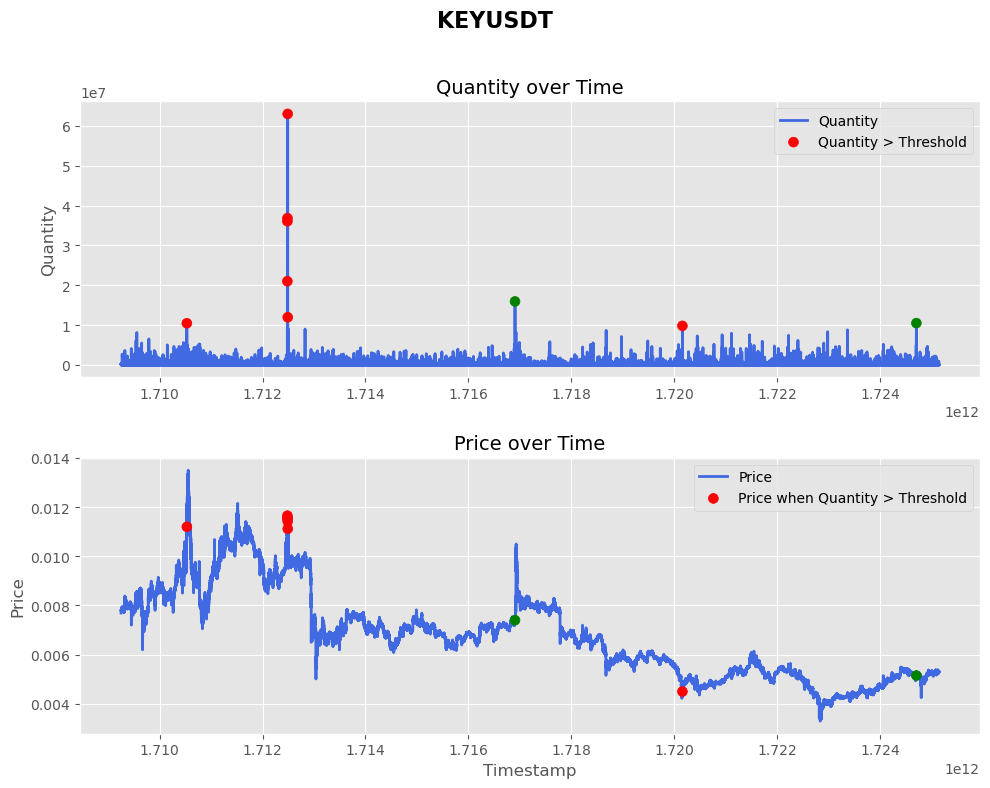

In [10]:
# Check available styles and choose one (e.g., 'ggplot')
plt.style.use('ggplot')  # Change to any available style from the list

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # Adjust figure size

# Plot Quantity
ax[0].plot(df_i['Timestamp'], df_i['Quantity'], color='royalblue', linewidth=2, label='Quantity', zorder=1)
ax[0].set_ylabel('Quantity', fontsize=12)
ax[0].set_title('Quantity over Time', fontsize=14)
ax[0].grid(True)  # Add gridlines

# Mark points where Quantity > Threshold
high_quantity_indices = df_i['Quantity'] > df_i['Quantity'].nlargest(10).iloc[-1]

# Determine colors based on BuyerIsMaker column
marker_colors = np.where(df_i['BuyerIsMaker'][high_quantity_indices], 'green', 'red')

# Plot markers with conditional coloring
ax[0].scatter(df_i['Timestamp'][high_quantity_indices], df_i['Quantity'][high_quantity_indices],
               color=marker_colors, s=50, label='Quantity > Threshold')  # Use scatter for variable colors
ax[0].legend(loc='upper right')  # Add legend


# Plot Price
ax[1].plot(df_i['Timestamp'], df_i['Price'], color='royalblue', linewidth=2, label='Price', zorder=1)
ax[1].set_xlabel('Timestamp', fontsize=12)
ax[1].set_ylabel('Price', fontsize=12)
ax[1].set_title('Price over Time', fontsize=14)
ax[1].grid(True)  # Add gridlines

# Mark points where Quantity > Threshold on Price plot
ax[1].scatter(df_i['Timestamp'][high_quantity_indices], df_i['Price'][high_quantity_indices],
               color=marker_colors, s=50, label='Price when Quantity > Threshold')  # Use scatter for variable colors
ax[1].legend(loc='upper right')  # Add legend

# Overall title
fig.suptitle(os.listdir(path)[num].split('-')[0], fontsize=16, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust space for the suptitle
plt.savefig('sample_data.png')
plt.show()